In [22]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Conv2D, Dense

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model = load_model('best-cnn-model.h5')
model.layers

In [6]:
conv1 = model.layers[0]
print(conv1.weights[0].shape)
print(conv1.weights[1].shape)

(3, 3, 1, 32)
(32,)


In [8]:
print(conv1.weights[0].numpy().mean())
print(conv1.weights[0].numpy().std())

-0.02158174
0.25749484


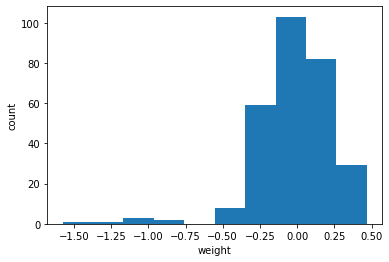

''

In [10]:
plt.hist(conv1.weights[0].numpy().reshape(-1, 1))

plt.xlabel('weight')
plt.ylabel('count')

plt.show()
;

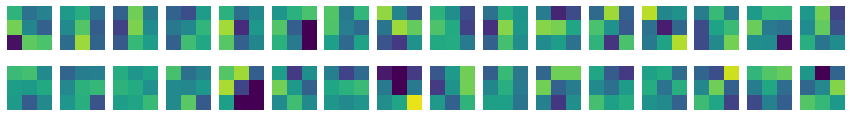

''

In [11]:
fig, axes = plt.subplots(2, 16, figsize=(15, 2))

for iRow in range(2):
    for iCol in range(16):
        axes[iRow, iCol].imshow(conv1.weights[0][:, :, 0, iRow * 16 + iCol], vmin=-0.5, vmax=0.5)
        axes[iRow, iCol].axis('off')

plt.show()
;

In [13]:
model_untrained = Sequential()
model_untrained.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

conv1_untrained = model_untrained.layers[0]
print(conv1_untrained.weights[0].shape)

(3, 3, 1, 32)


In [14]:
print(conv1_untrained.weights[0].numpy().mean())
print(conv1_untrained.weights[0].numpy().std())

-0.0001920623
0.08420543


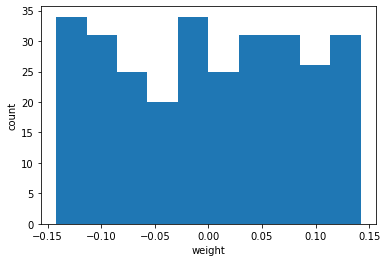

''

In [15]:
plt.hist(conv1_untrained.weights[0].numpy().reshape(-1, 1))

plt.xlabel('weight')
plt.ylabel('count')

plt.show()
;

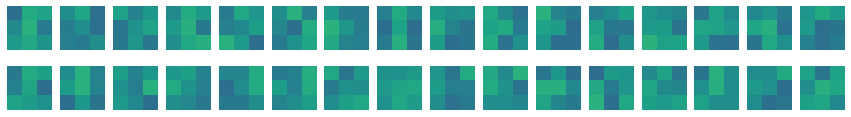

''

In [16]:
fig, axes = plt.subplots(2, 16, figsize=(15, 2))

for iRow in range(2):
    for iCol in range(16):
        axes[iRow, iCol].imshow(conv1_untrained.weights[0][:, :, 0, iRow * 16 + iCol], vmin=-0.5, vmax=0.5)
        axes[iRow, iCol].axis('off')

plt.show()
;

## Functional API

In [20]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [29]:
conv1_acti = Model(model.input, model.layers[0].output)

## Visualization

In [30]:
(train_input, train_target), (test_input, test_target) = \
    fashion_mnist.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


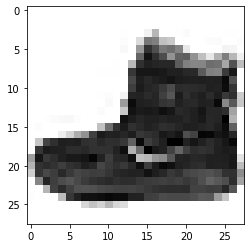

''

In [31]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()
;

In [32]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)


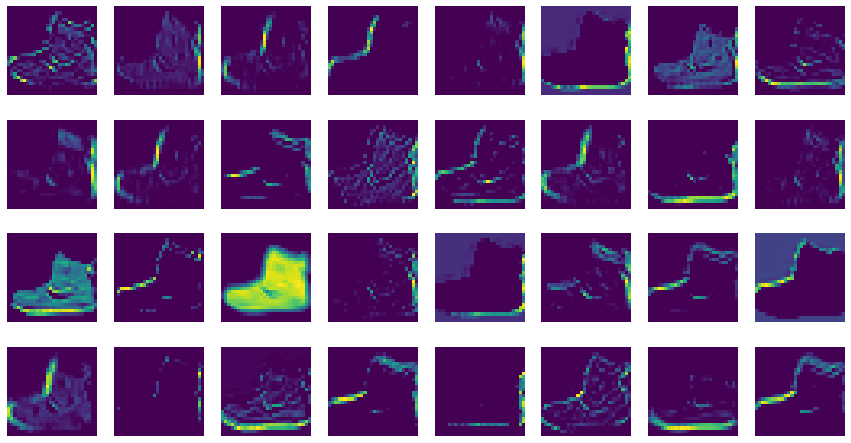

''

In [33]:
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for iRow in range(4):
    for iCol in range(8):
        axes[iRow, iCol].imshow(feature_maps[0, :, :, iRow * 8 + iCol])
        axes[iRow, iCol].axis('off')
        
plt.show()
;

In [36]:
conv2_acti = Model(model.input, model.layers[2].output)

feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1) / 255.0)
print(feature_maps.shape)

(1, 14, 14, 64)


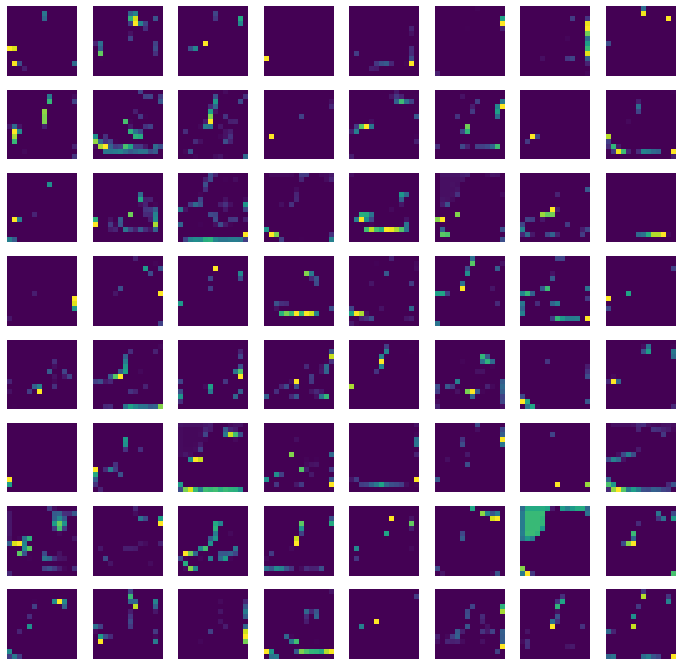

''

In [37]:
fig, axes = plt.subplots(8, 8, figsize=(12, 12))

for iRow in range(8):
    for iCol in range(8):
        axes[iRow, iCol].imshow(feature_maps[0, :, :, iRow * 8 + iCol])
        axes[iRow, iCol].axis('off')

plt.show()
;